# ANLY561 Homework10
# Hongyang Zheng

<br>
## Question1

In [59]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

# generate data points
def random_circle(N):
    x = np.reshape(rd.randn(N*2), (N, 2))
    for i in range(N):
        x[i,:] = x[i,:]/np.sqrt(np.sum(x[i,:]**2))
    return x

def random_radius(N, R=1):
    r = rd.rand(N)
    return R*np.sqrt(r) 
    
def random_disc(N, mu=[0,0], R=1):
    x = random_circle(N)
    r = random_radius(N, R=R)
    for i in range(N):
        x[i, :] = r[i] * x[i, :] + mu
    return x

N = 10
X1 = random_disc(N, mu=[-2, -2])
X2 = random_disc(N, mu=[2, 2])
X = np.concatenate((X1,X2),axis=0)

Y = [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1]
Y = np.array(Y)

###### a)

In [60]:
# initial points
v0 = np.array([-20,20])
b0 = 10

# when i = 0,1,...9 h=np.sum(v0*X[i])-b0+1
# when i = 10,11,...19 h=1+b0-np.sum(v0*X[i])
h = []
for i in range(20): 
    if i<=9:
        h.append(np.sum(v0*X[i])-b0+1)
    else:
        h.append(1+b0-np.sum(v0*X[i]))

# find the maximum value of h 
h_max=max(h)
z0=h_max+1

print('The initial interior point is:')
print([v0[0],v0[1],b0,z0])

The initial interior point is:
[-20, 20, 10, 33.14362784148963]


In [61]:
# sum(log(-h_i))
def log(X,LL):
        h1=0
        v1=LL[0]
        v2=LL[1]
        b=LL[2]
        z=LL[3]
        v=np.array([v1,v2])
        for i in range(20):
            if i<=9:
                h1=h1+(np.log(-np.sum(v*X[i])+b+z-1))
            else:
                h1=h1+(np.log(np.sum(v*X[i])-b+z-1))
                
        return h1

# sum(dlog(-h_i))
def dlog(X,LL):
        v1=LL[0]
        v2=LL[1]
        b=LL[2]
        z=LL[3]
        v=np.array([v1,v2])
        G1=0
        G2=0
        Gb=0
        Gz=0
        for i in range(20):
            if i<=9:
                G1=G1+(-X[i][0]/(-np.sum(v*X[i])+b+z-1))
                G2=G2+(-X[i][1]/(-np.sum(v*X[i])+b+z-1))
                Gb=Gb+(1/(-np.sum(v*X[i])+b+z-1))
                Gz=Gz+(1/(-np.sum(v*X[i])+b+z-1))
            else:
                G1=G1+(X[i][0]/(np.sum(v*X[i])-b+z-1))
                G2=G2+(X[i][1]/(np.sum(v*X[i])-b+z-1))
                Gb=Gb+(-1/(np.sum(v*X[i])-b+z-1))
                Gz=Gz+(1/(np.sum(v*X[i])-b+z-1))
                
        return np.array([G1,G2,Gb,Gz])

# sum(d2log(-h_i))
def d2log(X,LL):
        v1=LL[0]
        v2=LL[1]
        b=LL[2]
        z=LL[3]
        v=np.array([v1,v2])
        
        G11=0
        G12=0
        G1b=0
        G1z=0
        
        G21=0
        G22=0
        G2b=0
        G2z=0
        
        Gb1=0
        Gb2=0
        Gbb=0
        Gbz=0
        
        Gz1=0
        Gz2=0
        Gzb=0
        Gzz=0
        
        for i in range(20):
            if i<=9:
                    G11=G11+(-(X[i][0])**2/(-np.sum(v*X[i])+b+z-1)**2)
                    G12=G12+((-X[i][0]*X[i][1])/(-np.sum(v*X[i])+b+z-1)**2)
                    G1b=G1b+(X[i][0]/(-np.sum(v*X[i])+b+z-1)**2)
                    G1z=G1z+(X[i][0]/(-np.sum(v*X[i])+b+z-1)**2)

                    G21=G21+(-X[i][1]*X[i][0]/(-np.sum(v*X[i])+b+z-1)**2)
                    G22=G22+(-(X[i][1]**2)/(-np.sum(v*X[i])+b+z-1)**2)
                    G2b=G2b+(X[i][1]/(-np.sum(v*X[i])+b+z-1)**2)
                    G2z=G2z+(X[i][1]/(-np.sum(v*X[i])+b+z-1)**2)

                    Gb1=Gb1+(X[i][0]/(-np.sum(v*X[i])+b+z-1)**2)
                    Gb2=Gb2+(X[i][1]/(-np.sum(v*X[i])+b+z-1)**2)
                    Gbb=Gbb+(-1/(-np.sum(v*X[i])+b+z-1)**2)
                    Gbz=Gbz+(-1/(-np.sum(v*X[i])+b+z-1)**2)

                    Gz1=Gz1+(X[i][0]/(-np.sum(v*X[i])+b+z-1)**2)
                    Gz2=Gz2+(X[i][1]/(-np.sum(v*X[i])+b+z-1)**2)
                    Gzb=Gzb+(-1/(-np.sum(v*X[i])+b+z-1)**2)
                    Gzz=Gzz+(-1/(-np.sum(v*X[i])+b+z-1)**2)
            else:
                    G11=G11+(-(X[i][0])**2/(-np.sum(v*X[i])+b+z-1)**2)
                    G12=G12+((-X[i][0]*X[i][1])/(-np.sum(v*X[i])+b+z-1)**2)
                    G1b=G1b+(X[i][0]/(-np.sum(v*X[i])+b+z-1)**2)
                    G1z=G1z+(-X[i][0]/(-np.sum(v*X[i])+b+z-1)**2)

                    G21=G21+(-X[i][1]*X[i][0]/(-np.sum(v*X[i])+b+z-1)**2)
                    G22=G22+(-(X[i][1]**2)/(-np.sum(v*X[i])+b+z-1)**2)
                    G2b=G2b+(X[i][1]/(-np.sum(v*X[i])+b+z-1)**2)
                    G2z=G2z+(-X[i][1]/(-np.sum(v*X[i])+b+z-1)**2)

                    Gb1=Gb1+(X[i][0]/(-np.sum(v*X[i])+b+z-1)**2)
                    Gb2=Gb2+(X[i][1]/(-np.sum(v*X[i])+b+z-1)**2)
                    Gbb=Gbb+(-1/(-np.sum(v*X[i])+b+z-1)**2)
                    Gbz=Gbz+(1/(-np.sum(v*X[i])+b+z-1)**2)

                    Gz1=Gz1+(-X[i][0]/(-np.sum(v*X[i])+b+z-1)**2)
                    Gz2=Gz2+(-X[i][1]/(-np.sum(v*X[i])+b+z-1)**2)
                    Gzb=Gzb+(1/(-np.sum(v*X[i])+b+z-1)**2)
                    Gzz=Gzz+(-1/(-np.sum(v*X[i])+b+z-1)**2)
                
        return np.array([[G11,G12,G1b,G1z],[G21,G22,G2b,G2z],[Gb1,Gb2,Gbb,Gbz],[Gz1,Gz2,Gzb,Gzz]])

In [62]:
# function for backtracking
def backtracking(X, LL0, dx, f, f2, df0, alpha=0.2, beta=0.8, verbose=False):
        
    delta=alpha*np.sum(dx*df0)
    t=1
    f0= f(LL0)-f2(X,LL0)
    LL=LL0+dx
    fx=f(LL)-f2(X,LL)
    #print(fx)
    while (not np.isfinite(fx)) or f(LL)>=0:
        #print(fx)
        t=beta*t
        LL=LL0+t*dx
        fx= f(LL)-f2(X,LL)
            
    return LL       

In [63]:
# f 
f=lambda LL: LL[3]
# df
df=np.array([0,0,0,1])
# d2f
d2f=np.zeros((4,4))

# initial interior point
LL0=np.array([-20,20,10,z0])

# newton's method
d2fb = d2f - d2log(X,LL0)
dfb = df - dlog(X,LL0)
dx_newt = - np.linalg.solve(d2fb, dfb)

LL = backtracking(X, LL0, dx_newt, f, log, dfb)

p0=LL

print('The interior point is:')
print(LL)

The interior point is:
[ 22.68356861  30.49704291   4.73014833 -70.32263346]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]



<br>
###### b)

In [64]:
# sum(log(-h_i))
def log1(X,LL):
        h1=0
        v1=LL[0]
        v2=LL[1]
        b=LL[2]
        v=np.array([v1,v2])
        for i in range(20):
            if i<=9:
                h1=h1+(np.log(-np.sum(v*X[i])+b-1))
            else:
                h1=h1+(np.log(np.sum(v*X[i])-b-1))
                
        return h1

# sum(dlog(-h_i))
def dlog1(X,LL):
        v1=LL[0]
        v2=LL[1]
        b=LL[2]
        v=np.array([v1,v2])
        G1=0
        G2=0
        Gb=0
        for i in range(20):
            if i<=9:
                G1=G1+(-X[i][0]/(-np.sum(v*X[i])+b-1))
                G2=G2+(-X[i][1]/(-np.sum(v*X[i])+b-1))
                Gb=Gb+(1/(-np.sum(v*X[i])+b-1))
            else:
                G1=G1+(X[i][0]/(np.sum(v*X[i])-b-1))
                G2=G2+(X[i][1]/(np.sum(v*X[i])-b-1))
                Gb=Gb+(-1/(np.sum(v*X[i])-b-1))
                
        return np.array([G1,G2,Gb])

# sum(d2log(-h_i))
def d2log1(X,LL):
        v1=LL[0]
        v2=LL[1]
        b=LL[2]
        v=np.array([v1,v2])
        
        G11=0
        G12=0
        G1b=0
        
        G21=0
        G22=0
        G2b=0
        
        Gb1=0
        Gb2=0
        Gbb=0
        
        for i in range(20):
            if i<=9:
                    G11=G11+(-(X[i][0])**2/(-np.sum(v*X[i])+b-1)**2)
                    G12=G12+((-X[i][0]*X[i][1])/(-np.sum(v*X[i])+b-1)**2)
                    G1b=G1b+(X[i][0]/(-np.sum(v*X[i])+b-1)**2)

                    G21=G21+(-X[i][1]*X[i][0]/(-np.sum(v*X[i])+b-1)**2)
                    G22=G22+(-(X[i][1]**2)/(-np.sum(v*X[i])+b-1)**2)
                    G2b=G2b+(X[i][1]/(-np.sum(v*X[i])+b-1)**2)

                    Gb1=Gb1+(X[i][0]/(-np.sum(v*X[i])+b-1)**2)
                    Gb2=Gb2+(X[i][1]/(-np.sum(v*X[i])+b-1)**2)
                    Gbb=Gbb+(-1/(-np.sum(v*X[i])+b-1)**2)

            else:
                    G11=G11+(-(X[i][0])**2/(-np.sum(v*X[i])+b-1)**2)
                    G12=G12+((-X[i][0]*X[i][1])/(-np.sum(v*X[i])+b-1)**2)
                    G1b=G1b+(X[i][0]/(-np.sum(v*X[i])+b-1)**2)

                    G21=G21+(-X[i][1]*X[i][0]/(-np.sum(v*X[i])+b-1)**2)
                    G22=G22+(-(X[i][1]**2)/(-np.sum(v*X[i])+b-1)**2)
                    G2b=G2b+(X[i][1]/(-np.sum(v*X[i])+b-1)**2)

                    Gb1=Gb1+(X[i][0]/(-np.sum(v*X[i])+b-1)**2)
                    Gb2=Gb2+(X[i][1]/(-np.sum(v*X[i])+b-1)**2)
                    Gbb=Gbb+(-1/(-np.sum(v*X[i])+b-1)**2)

        return np.array([[G11,G12,G1b],[G21,G22,G2b],[Gb1,Gb2,Gbb]])

In [65]:
# function for backtracking1
def backtracking1(X, x0, dx, f, f2, df0, alpha=0.1, beta=0.5, verbose=False):
    
    delta=alpha*np.sum(dx*df0)
    t=1
    f0= f(x0)-f2(X,x0)
    x=x0+dx
    fx=f(x)-f2(X,x)
    #print(fx)
    while (not np.isfinite(fx)) or fx>f0+delta*t:
        #print(fx)
        t=beta*t
        x=x0+t*dx
        fx= f(x)-f2(X,x)
            
    return x     

# function for backtracking2
def backtracking2(X, x0, dx, f, f2, df0, s, alpha=0.1, beta=0.5, verbose=False):
    
    delta=alpha*np.sum(dx*df0)
    t=1
    f0= f(x0)-f2(X,x0)/s
    x=x0+dx
    fx=f(x)-f2(X,x)/s
    #print(fx)
    while (not np.isfinite(fx)) or fx>f0+delta*t:
        #print(fx)
        t=beta*t
        x=x0+t*dx
        fx= f(x)-f2(X,x)/s
            
    return x       

In [66]:
# Function for log barrier method
def log_barrier_opt(X, x0, f1, df1, d2f1, log1, dlog1, d2log1, al=0.1, be=0.5, M=10, init_iter=3, out_iter=5, in_iter=2, verbose=False):
    
    # Centering step
    for i in range(init_iter):
        d1fb0 = df1(x0) - dlog1(X,x0)
        d2fb0 = d2f1(x0) - d2log1(X,x0)
        dx_newt = - np.linalg.solve(d2fb0, d1fb0)
        
        x = backtracking1(X, x0, dx_newt, f1, log1, d1fb0)
        print(x)
                   
    # Now begin the outer iterations
    t=1
    for i in range(out_iter):
        t = M * t
        if verbose:
            pts = [x]
        # The inner iterations
        for j in range(in_iter):
            d1fb0 = df1(x) - dlog1(X,x)/t
            d2fb0 = d2f1(x) - d2log1(X,x)/t
            dx_newt = - np.linalg.solve(d2fb0, d1fb0)

            x = backtracking2(X, x, dx_newt, f1, log1, d1fb0, t)
            print(x)
            
    return x
  
# initial interior point 
x0=np.array([LL[0],LL[1],LL[2]])
# f(x),df(x),d2f(x)
f1=lambda x: ((x[0]**2+x[1]**2))/2
df1=lambda x: np.array([x[0],x[1],0])
d2f1=lambda x: np.array([[1,0,0],[0,1,0],[0,0,0]])

x = log_barrier_opt(X, x0, f1, df1, d2f1, log1, dlog1, d2log1)
q_ast =  x
print('The final point is:')
print(x)

[11.72872129 15.6105171   1.76788856]
[11.72872129 15.6105171   1.76788856]
[11.72872129 15.6105171   1.76788856]
[5.94063733 7.87662263 1.70030715]
[3.12051559 4.07881894 0.92634664]
[1.59006012 2.06727851 0.90684656]
[0.85564466 1.09019941 0.60356848]
[0.64833224 0.82376751 0.57963559]
[0.49640688 0.62712317 0.45477883]
[0.43527612 0.54954921 0.37382608]
[0.38230887 0.48208464 0.25874608]
[0.35855074 0.45206305 0.19839044]
[0.33638564 0.42399248 0.11788458]
The final point is:
[0.33638564 0.42399248 0.11788458]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


<br>
###### c)

In [67]:
# df(x)+dh(x).T*mu
# (3,1)+(20,3).T*(20,1)
# (3,1)+(3,20)*(20,1)
# (3,1)

# f(x)=(v1**2+v2**2)/2 (1,1)
# df(x)=[[v1],[v2],[0]] (1,3)
# d2f(x)=([1,0,0],[0,1,0],[0,0,0]) (3,3)

# h(x)=1-Y[i]*(v[0]*X[i][0]+v[1]*X[i][1]-b) (20,1)
# dh(x)=[[-Y[i]*X[i][0]],[-Y[i]*X[i][1]], Y[i]] (20,3)
# d2h(x)=[[0,0,0],[0,0,0],[0,0,0]] (20,20)

# df
df = lambda x: np.array([x[0],x[1],0])

# dh
def dh(X,Y,LL):
        v1=LL[0]
        v2=LL[1]
        b=LL[2]
        G=[]
        for i in range(20):
                G.append(np.array([-Y[i]*X[i][0], -Y[i]*X[i][1], Y[i]]))

        return np.reshape(G,(20,3))
    
# h
def h(X,Y,LL):
        h1=[]
        v1=LL[0]
        v2=LL[1]
        b=LL[2]
        v=np.array([v1,v2])
        for i in range(20):
            h1.append(1-Y[i]*(np.sum(v*X[i])-b))
        
        #np.array([[h1[0]],[h1[1]],[h1[2]],[h1[3]],[h1[4]],[h1[5]],[h1[6]],[h1[7]],[h1[8]],[h1[9]],[h1[10]],[h1[11]],[h1[12]],[h1[13]],[h1[14]],[h1[15]],[h1[16]],[h1[17]],[h1[18]],[h1[19]]])
        return np.reshape(h1,(20,1))
    
# mu
mu=[]
for i in range(20):
    mu.append(-1/h(X,Y,x0)[i])
u=np.reshape(mu,(20,1))

def df_dht_mu(mu,X,Y,x):
    m1=dh(X,Y,x).T@mu
    a=np.reshape(df(x),(3,1))
    m1=a+m1
    
    return m1

# -mu*h-1/t
# (20,1)

# calculate -mu_i*h_i-1/t
def mu_h_t(mu,X,Y,x,t):
    a=[]
    h1=h(X,Y,x)
    for i in range(20):
        a.append(-mu[i]*h1[i]-1/t)
        
    return np.reshape(a,(20,1))

In [68]:
#(3,3) (3,20)
#(20,3) (20,20)

# (3,3)-d2f partial v1,v2,b to df(x)+dh(x).T*mu
# (3,20)-partial mu_1,...mu_10 to df(x)+dh(x).T*mu
# (20,3)-partial v1,v2,b to -mu_i*h_i-1/t
# (20,20)-partial mu_1,...mu_10 to -mu_i*h_i-1/t

def matrix1_1():
    a=np.array([[1,0,0],[0,1,0],[0,0,0]])
    return a

In [69]:
def matrix1_2(X,Y):
    a=[]
    b=[]
    c=[]
    for i in range(20):
        a.append(-Y[i]*X[i][0])
    for i in range(20):
        a.append(-Y[i]*X[i][1])
    for i in range(20):
        a.append(Y[i])
        
    return np.reshape(a,(3,20))

In [70]:
# (20,3)-partial v1,v2,b to -mu_i*h_i-1/t
def matrix2_1(mu,X,Y):
    a=[]
    for i in range(20):
        a.append(mu[i]*Y[i]*X[i][0])
        a.append(mu[i]*Y[i]*X[i][1])
        a.append(-mu[i]*Y[i])
    return np.reshape(a,(20,3))   

In [71]:
# (20,20)-partial mu_1,...mu_10 to -mu_i*h_i-1/t
def matrix2_2(X,Y,x):
    a=[]
    v=np.array([x[0],x[1]])
    b=x[2]
    for i in range(20):
        a.append(-1+Y[i]*(np.sum(v*X[i])-b))
   
    return a

phi = lambda X, Y, x, mu, t:  np.concatenate((df_dht_mu(mu,X,Y,x),mu_h_t(mu,X,Y,x,t)))
dphi = lambda X, Y, x, mu: np.reshape(np.block([[matrix1_1(), matrix1_2(X,Y)], [matrix2_1(u,X,Y), np.diag(matrix2_2(X,Y,x))]]), (23, 23))

101.14090682801142
0.08420023529454437


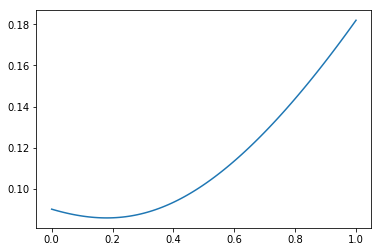

47.37672917680133
0.051789087004614695


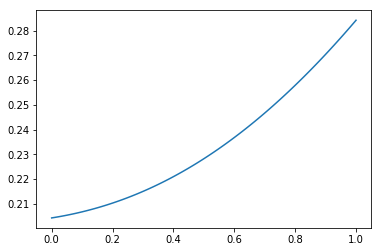

32.13624420608701
0.031366882789690874


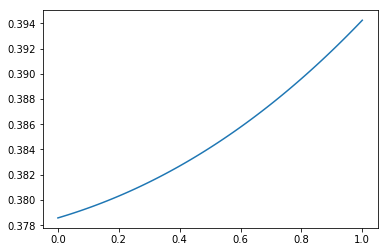

26.535424746099952
0.01781859010764021


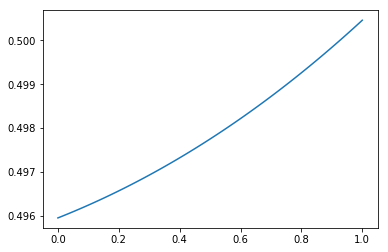

24.350153120201107
0.010729466664799975


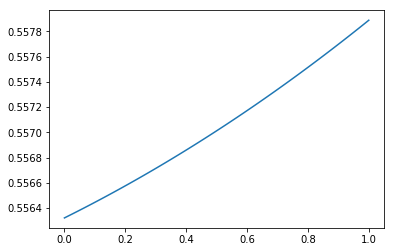

23.53717748126918
0.009192415251772872


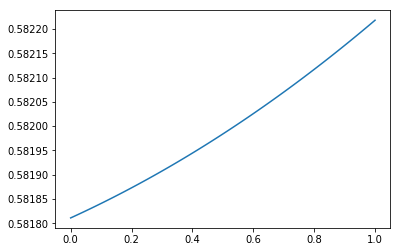

23.36073977794033
0.0023747213888940036


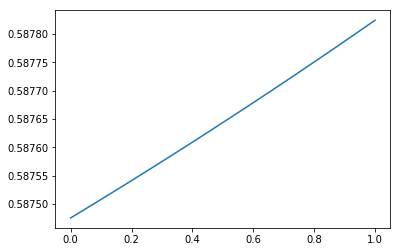

23.138228744006515
0.0012616828748382672


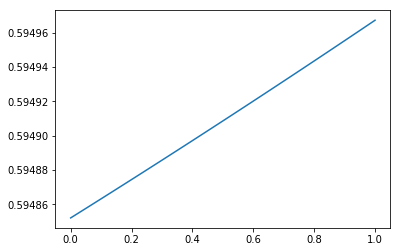

23.09314811736972
0.0006224548808995944


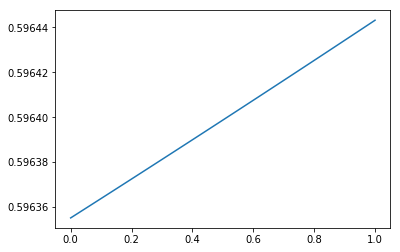

23.032689005591447
0.0002592323613369211


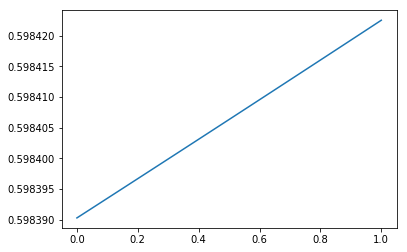

Numerical solution after 10 steps:
[0.83099981 0.77832806 0.10165259]
[[0.02471827]
 [0.01664485]
 [0.01818009]
 [0.01412103]
 [0.01782746]
 [0.01507059]
 [0.03555566]
 [0.0209034 ]
 [0.02252024]
 [0.0282249 ]
 [0.01825319]
 [0.02365729]
 [0.01824519]
 [0.01471206]
 [0.02381466]
 [0.02128957]
 [0.01815516]
 [0.01538205]
 [0.02993414]
 [0.03032322]]


In [72]:
def l2(x):
    return np.sqrt(np.sum(x**2))

def diagnostic(X, Y, d, x, mu, t, dx_mu):
    n = 100
    s = np.linspace(0, 1.0, n)
    vals = np.zeros(n)
    for i in range(n):
        vals[i] = l2(phi(X, Y, x + s[i]*dx_mu[:d], mu + s[i]*dx_mu[d:], t))
        
    plt.plot(s, vals)
    plt.show()
    
num_iter = 10
d = 3 # dimension of the program
m = 20 # number of inequality constraints
nu = 10 # Interior point scaling parameter

# Backtracking parameters
alpha = 0.1
beta = 0.5
xx = [x]

eta = lambda X, Y, x, mu: np.sum(-h(X,Y,x).T*mu)# Computation of surrogate duality gap

##################################
for i in range(num_iter):
    t = nu * m / eta(X,Y,x,u)
    phi0 = phi(X,Y,x,mu,t)
    norm_phi0 = l2(phi0)
    print(t)
    print(norm_phi0)
    
    # Compute the Newton search direction
 
    dx_mu = np.linalg.solve(dphi(X,Y,x,u), -phi0)
    
    # Initialize backtracking
    s = 1 # using s for backtracking parameter since t is taken
    yx = np.reshape(x,(3,1)) + s*dx_mu[:d]
    ymu = mu + s*dx_mu[d:]
    hyx = h(X,Y,np.array([float(yx[0]),float(yx[1]),float(yx[2])]))
    phiy = phi(X, Y, np.array([float(yx[0]),float(yx[1]),float(yx[2])]), ymu, t)
    norm_phiy = l2(phiy)
    
    diagnostic(X, Y, d, np.reshape(x,(3,1)), u, t, dx_mu)
    
    while 0 < ymu[ymu<=0].size or 0 < hyx[0<=hyx].size or (1-alpha*s)*norm_phi0 < norm_phiy:
        s = beta * s
        yx = np.reshape(x,(3,1)) + s*dx_mu[:d]
        ymu = mu + s*dx_mu[d:]
        hyx = h(X,Y,np.array([float(yx[0]),float(yx[1]),float(yx[2])]))
        phiy = phi(X, Y, np.array([float(yx[0]),float(yx[1]),float(yx[2])]), ymu, t)
        norm_phiy = l2(phiy)
        
    x = np.array([float(yx[0]),float(yx[1]),float(yx[2])])
    mu = ymu
    xx.append(x)
    
    q_pd = x

#print(xx)
print('Numerical solution after %d steps:' % num_iter)
print(x)
print(mu)

<br>
###### d)

In [73]:
def abline(slope, intercept, *fmt):
    
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, *fmt)

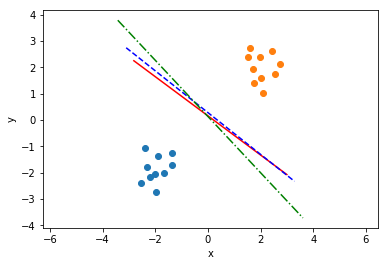

In [74]:
plt.scatter(X1[:,0], X1[:,1])
plt.scatter(X2[:,0], X2[:,1])

# from a) interior point
abline(-p0[0] / p0[1], p0[2] / p0[1], 'r')

# from b) log-barrier solution
abline(-q_ast[0] / q_ast[1], q_ast[2] / q_ast[1], 'b--')

# from c) primal-dual solution
abline(-q_pd[0] / q_pd[1], q_pd[2] / q_pd[1], 'g-.')

plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()